![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/05_Cluster%20Analysis%20con%20k-Means/05_clustering-kmeans_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 05 | Cluster Analysis with k-Means

## Load the Data

- Simply execute the following lines of code to load the data
- This dataset contains **statistics** (columns)
- About **Car Models** (rows)

In [1]:
import seaborn as sns #!

df_mpg = sns.load_dataset(name='mpg', index_col='name')
df_mpg.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
honda civic 1300,35.1,4,81.0,60.0,1760,16.1,81,japan
chrysler lebaron salon,17.6,6,225.0,85.0,3465,16.6,81,usa
ford fairmont,26.4,4,140.0,88.0,2870,18.1,80,usa
chevrolet malibu,13.0,8,350.0,145.0,3988,13.0,73,usa
saab 99e,25.0,4,104.0,95.0,2375,17.5,70,europe


## Feature Selection

- Select 2 columns for the modelling

In [16]:
df_carmodel = sns.load_dataset(name='mpg', index_col='name')[['mpg', 'acceleration']]
df_carmodel.sample(4)

,mpg,acceleration
name,,
ford fiesta,36.1,14.4
ford pinto,19.0,18.5
ford pinto (sw),22.0,16.0
datsun 710,32.0,19.0


## Data `preprocessing`

- Do you need to *transform* the data
- To get a **truthful insight** of the model?

In [17]:
df_carmodel.isna().sum()

mpg             0
acceleration    0
dtype: int64

In [18]:
df_carmodel

,mpg,acceleration
name,,
chevrolet chevelle malibu,18.0,12.0
buick skylark 320,15.0,11.5
plymouth satellite,18.0,11.0
amc rebel sst,16.0,12.0
ford torino,17.0,10.5
...,...,...
ford mustang gl,27.0,15.6
vw pickup,44.0,24.6
dodge rampage,32.0,11.6


In [19]:
import pandas as pd
df_carmodel = pd.get_dummies(data=df_carmodel, drop_first=True)
df_carmodel

,mpg,acceleration
name,,
chevrolet chevelle malibu,18.0,12.0
buick skylark 320,15.0,11.5
plymouth satellite,18.0,11.0
amc rebel sst,16.0,12.0
ford torino,17.0,10.5
...,...,...
ford mustang gl,27.0,15.6
vw pickup,44.0,24.6
dodge rampage,32.0,11.6


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
scaler.fit(df_carmodel)

MinMaxScaler()

In [23]:
df_scaled = scaler.transform(df_carmodel)

In [24]:
df_scaled = pd.DataFrame(df_scaled, columns=df_carmodel.columns, index=df_carmodel.index)
df_scaled

,mpg,acceleration
name,,
chevrolet chevelle malibu,0.239362,0.238095
buick skylark 320,0.159574,0.208333
plymouth satellite,0.239362,0.178571
amc rebel sst,0.186170,0.238095
ford torino,0.212766,0.148810
...,...,...
ford mustang gl,0.478723,0.452381
vw pickup,0.930851,0.988095
dodge rampage,0.611702,0.214286


## `KMeans()` Model in Python

### Fit the Model

- To cluster 3 groups

In [25]:
from sklearn.cluster import KMeans

In [26]:
model_kms = KMeans(n_clusters=3)

In [27]:
model_kms.fit(df_scaled)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

### Calculate Predictions

In [28]:
model_kms.predict(df_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 2,
       0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2,

### Create a New DataFrame for the Predictions

In [41]:
df_pred= df_scaled.copy()
df_pred['pred_kms_scaled'] = model_kms.predict(df_scaled)
df_pred

,mpg,acceleration,pred_kms_scaled
name,,,
chevrolet chevelle malibu,0.239362,0.238095,1
buick skylark 320,0.159574,0.208333,1
plymouth satellite,0.239362,0.178571,1
amc rebel sst,0.186170,0.238095,1
ford torino,0.212766,0.148810,1
...,...,...,...
ford mustang gl,0.478723,0.452381,2
vw pickup,0.930851,0.988095,0
dodge rampage,0.611702,0.214286,0


### Visualize the Model

- You colour the points with the the value of the predictions

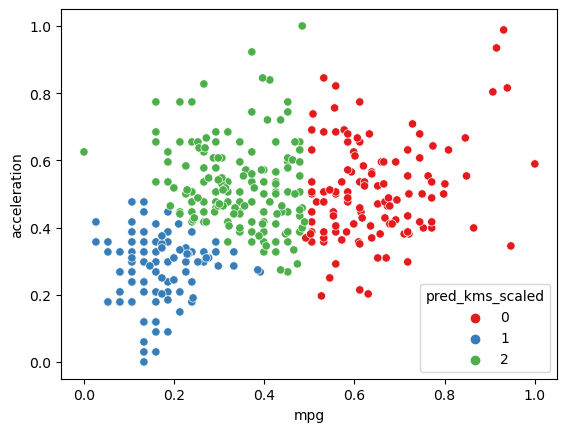

In [31]:
sns.scatterplot(x='mpg', y='acceleration', data=df_pred,  hue='pred_kms_scaled', palette='Set1');

## Other `Clustering` Models in Python

- Visit the `sklearn` website [here ↗](https://scikit-learn.org/stable/)
- **Pick 2 new models** and compute the *Clustering*

### Other Model 1

#### Fit the Model

- To cluster 3 groups

In [69]:
from sklearn.cluster import OPTICS
model_op = OPTICS(min_samples=30)
model_op.fit(df_scaled)

OPTICS(min_samples=30)

#### Calculate Predictions

In [70]:
model_op.fit_predict(df_scaled)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1, -1, -1, -1, -1,  0,
        1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1, -1,  1, -1, -1, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  1,  1, -1,
       -1,  0,  0,  0,  0,  1, -1, -1,  1,  0, -1, -1, -1,  0, -1, -1, -1,
        0,  1,  0, -1,  0, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
        0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1, -1, -1,  0,  0,  0,  0, -1, -1, -1, -1,  1,  0,  0, -1, -1,  1,
       -1, -1, -1, -1,  0, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  0,  0,  0,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1,  1,  0, -1,  1, -1,  0,  0,  0,  0, -1, -1, -1, -1, -1,
        0, -1,  0,  0,  1

#### Create a New Column for the Predictions

In [71]:
df_pred['pred_op_scaled'] = model_op.fit_predict(df_scaled)
df_pred

,mpg,acceleration,pred_kms_scaled,pred_op_scaled
name,,,,
chevrolet chevelle malibu,0.239362,0.238095,1,-1
buick skylark 320,0.159574,0.208333,1,-1
plymouth satellite,0.239362,0.178571,1,-1
amc rebel sst,0.186170,0.238095,1,-1
ford torino,0.212766,0.148810,1,-1
...,...,...,...,...
ford mustang gl,0.478723,0.452381,2,-1
vw pickup,0.930851,0.988095,0,-1
dodge rampage,0.611702,0.214286,0,-1


#### Visualize the Model

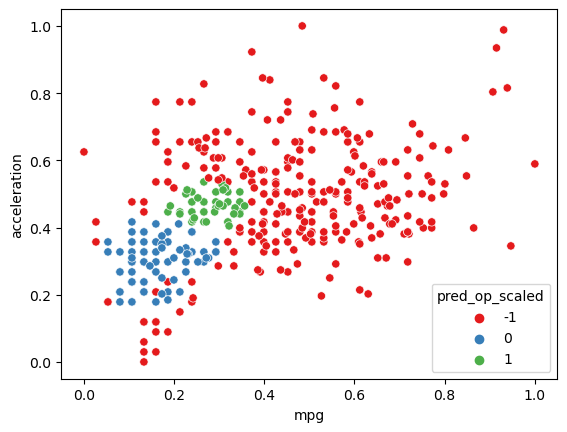

In [72]:
sns.scatterplot(x='mpg', y='acceleration', data=df_pred,  hue='pred_op_scaled', palette='Set1');

### Other Model 2

#### Fit the Model

- To cluster 3 groups

In [85]:
from sklearn.cluster import MiniBatchKMeans
model_mb = MiniBatchKMeans()
model_mb.fit(df_scaled)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


MiniBatchKMeans()

#### Calculate Predictions

In [86]:
model_mb.fit_predict(df_scaled)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 3, 1, 3, 7, 2, 3, 7,
       3, 7, 1, 5, 1, 5, 6, 7, 7, 7, 2, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5,
       5, 1, 6, 1, 1, 7, 7, 2, 0, 2, 4, 2, 2, 3, 3, 2, 6, 3, 5, 5, 1, 5,
       5, 5, 5, 5, 5, 1, 5, 1, 1, 1, 1, 3, 6, 3, 3, 3, 7, 7, 3, 5, 5, 5,
       1, 5, 5, 5, 5, 1, 5, 5, 5, 1, 6, 1, 1, 3, 2, 5, 5, 5, 5, 1, 6, 6,
       3, 1, 6, 1, 7, 5, 5, 2, 3, 1, 1, 5, 7, 1, 5, 3, 3, 1, 6, 2, 3, 2,
       3, 6, 6, 1, 1, 1, 5, 1, 1, 3, 7, 7, 0, 2, 7, 3, 7, 7, 7, 0, 1, 1,
       6, 6, 5, 1, 1, 5, 6, 6, 6, 6, 1, 1, 5, 0, 3, 1, 3, 7, 3, 3, 1, 0,
       6, 7, 3, 7, 7, 4, 7, 3, 7, 3, 7, 1, 5, 1, 5, 3, 7, 3, 3, 2, 2, 0,
       4, 6, 6, 1, 6, 0, 4, 3, 7, 1, 5, 6, 1, 1, 5, 5, 1, 1, 2, 0, 4, 7,
       4, 5, 6, 1, 1, 1, 3, 6, 6, 5, 5, 5, 1, 0, 3, 3, 3, 4, 0, 0, 0, 7,
       7, 7, 4, 0, 2, 4, 4, 1, 1, 1, 6, 6, 1, 7, 3, 6, 1, 3, 6, 1, 1, 1,
       5, 1, 0, 7, 7, 0, 1, 3, 3, 7, 1, 1, 3, 1, 0, 3, 3, 6, 3, 6, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 7, 2, 3, 2, 2,

#### Create a New Column for the Predictions

In [88]:
df_pred['pred_mb_scaled'] = model_mb.fit_predict(df_scaled)
df_pred

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


,mpg,acceleration,pred_kms_scaled,pred_op_scaled,pred_mb_scaled
name,,,,,
chevrolet chevelle malibu,0.239362,0.238095,1,-1,1
buick skylark 320,0.159574,0.208333,1,-1,1
plymouth satellite,0.239362,0.178571,1,-1,1
amc rebel sst,0.186170,0.238095,1,-1,1
ford torino,0.212766,0.148810,1,-1,1
...,...,...,...,...,...
ford mustang gl,0.478723,0.452381,2,-1,0
vw pickup,0.930851,0.988095,0,-1,6
dodge rampage,0.611702,0.214286,0,-1,4


#### Visualize the Model

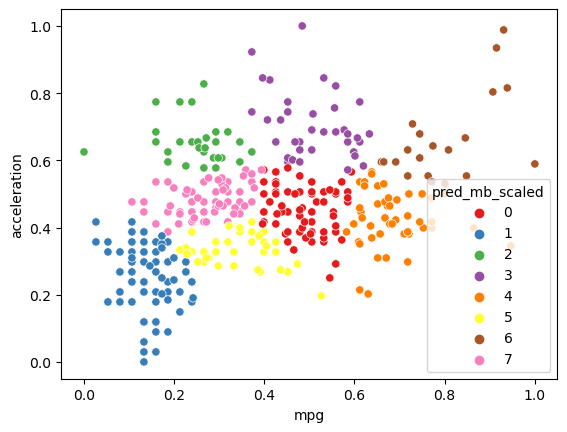

In [89]:
sns.scatterplot(x='mpg', y='acceleration', data=df_pred,  hue='pred_mb_scaled', palette='Set1');

## Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [X] Understand how the **machine optimizes a model**
    - No more than to find the best numbers for a mathematical equation
- [X] **Residual Sum of Squares (RSS)** as a fundamental measure for the **error**. We see it on ↓
    - [Neural Networks](https://youtu.be/IHZwWFHWa-w?t=211) 
    - Linear Regression
    - Variance
- [X] Understand the necessity to **Scale** the Data
    - For all algorithms that involves **distance calculation**.
- [X] Understand that programming is not an end itself, but a tool to achieve the end
    - We need to understand the problem and design the solution before coding
    - But we won't need how to design the solution if we don't know how to code first
    - Solution? Apply the discipline
- [X] There is **not a unique way to group data**. The same way it is not a unique way ↓
    - To predict a number **Regression Mathematical Equations**
    - To predict a category **Classification Mathematical Equations**

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.